In [6]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from scipy.stats import linregress
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
raise_data = [{'y': [0.0859375, 0.267334, 0.1723633, 0.5603027, 0.7158203, 0.7834473, 0.8330078, 0.8979492, 0.8972168, 0.9128418, 0.9020996, 0.8833008, 0.8161621, 0.6821289, 0.4240723, 0.104248, -0.1328125, -0.2404785, -0.002197266], 'x': [1.185059, 1.049805, 1.119873, 0.7885742, 0.6872559, 0.4438477, 0.1669922, 0.06005859, -0.02416992, -0.04614258, -0.05810547, -0.06640625, 0.1740723, 0.5432129, 0.9885254, 1.175537, 1.22168, 1.088623, 1.131836], 'index': 0, 'z': [-0.1933594, -0.1555176, -0.2121582, -0.3725586, -0.4265137, -0.4372559, -0.328125, -0.3276367, -0.411377, -0.4086914, -0.388916, -0.4255371, -0.2910156, -0.2724609, -0.2731934, -0.2331543, -0.2680664, -0.09204102, -0.04516602]}, {'y': [0.05151367, 0.5732422, 0.7312012, 0.8215332, 0.8618164, 0.9438477, 0.9216309, 0.9633789, 0.9335938, 0.9033203, 0.9160156, 0.918457, 0.9367676, 0.8422852, 0.7414551, 0.4880371, 0.2797852], 'x': [1.121094, 0.8188477, 0.5981445, 0.4929199, 0.3688965, 0.03271484, 0.1154785, 0.1447754, 0.02783203, 0.03198242, 0.005615234, -0.008056641, 0.0390625, 0.229248, 0.5639648, 0.9052734, 1.107666], 'index': 1, 'z': [-0.2441406, -0.2468262, -0.2841797, -0.2434082, -0.2145996, -0.3010254, -0.3596191, -0.3425293, -0.3271484, -0.3225098, -0.3422852, -0.2937012, -0.3383789, -0.3200684, -0.2182617, -0.1845703, -0.2919922]}, {'y': [0.5100098, -0.01171875, 0.1645508, 0.4001465, 0.5651855, 0.6794434, 0.7990723, 0.8803711, 0.8574219, 0.861084, 0.8442383, 0.8754883, 0.8847656, 0.8701172, 0.8078613, 0.6074219, 0.4460449], 'x': [1.883301, 1.112549, 0.9592285, 0.8913574, 0.7980957, 0.7299805, 0.5686035, 0.3310547, 0.1320801, -0.09521484, -0.1481934, -0.246582, -0.2792969, 0.09301758, 0.4404297, 0.7539063, 1.12793], 'index': 2, 'z': [-0.534668, -0.06933594, -0.4445801, -0.4672852, -0.4970703, -0.3820801, -0.3439941, -0.3583984, -0.3884277, -0.3098145, -0.3518066, -0.359375, -0.402832, -0.2487793, -0.2866211, -0.2836914, -0.1518555]}, {'y': [0.03662109, -0.2299805, -0.01708984, -0.003417969, 0.5839844, 0.7565918, 0.8417969, 0.9128418, 0.9453125, 0.9223633, 0.8972168, 0.8930664, 0.9077148, 0.8747559, 0.7573242, 0.5581055, 0.2915039, 0.06982422, -0.128418, 0.01171875, -0.006591797], 'x': [1.401611, 1.158936, 1.112549, 1.19751, 0.8225098, 0.6169434, 0.3103027, 0.1809082, 0.08520508, -0.06225586, -0.1147461, -0.1748047, -0.1474609, 0.1337891, 0.4916992, 0.800293, 1.033691, 1.271973, 1.188721, 1.196777, 1.112061], 'index': 3, 'z': [-0.2807617, -0.1882324, -0.02319336, -0.2336426, -0.2319336, -0.2128906, -0.2185059, -0.251709, -0.2453613, -0.3476563, -0.3276367, -0.3132324, -0.3271484, -0.2609863, -0.2199707, -0.1921387, -0.09204102, -0.1777344, -0.2097168, -0.1137695, -0.0534668]}, {'y': [0.03417969, 0.4248047, 0.6313477, 0.7380371, 0.8364258, 0.909668, 0.8793945, 0.8991699, 0.8955078, 0.8769531, 0.895752, 0.7521973, 0.5852051, 0.395752], 'x': [1.162598, 1.015381, 0.7512207, 0.6242676, 0.3950195, 0.2023926, 0.1105957, -0.1826172, -0.2341309, -0.248291, -0.1660156, 0.1787109, 0.7722168, 1.106934], 'index': 4, 'z': [-0.208252, -0.2570801, -0.2495117, -0.2675781, -0.222168, -0.2373047, -0.376709, -0.3027344, -0.3308105, -0.3325195, -0.3232422, -0.2851563, -0.175293, -0.2036133]}]
clap_data = [{'y': [0.3051758, 0.9631348, 0.8183594, 0.4584961, 1.398438, 0.1398926, 0.8405762, 0.1179199, 0.8139648, 0.08178711, 0.9375, 0.5153809, -0.09399414, 0.5820313, 0.2468262, 0.01708984, -0.02636719], 'x': [1.098389, 0.5361328, -0.2949219, -0.8525391, 0.90625, -1.358154, 0.8852539, -1.161865, 0.3269043, -0.9025879, 0.2280273, -0.713623, -0.01049805, 0.5046387, 1.017822, 1.19751, 1.132568], 'index': 0, 'z': [0.03808594, -0.078125, -0.3884277, 0.3273926, 0.7380371, 0.4309082, 0.105957, 0.4462891, 0.5400391, 0.5107422, 0.7336426, 0.2971191, 0.1293945, 0.4777832, 0.1704102, -0.1459961, -0.08325195]}, {'y': [-0.01391602, 0.4296875, 1.05127, 1.999939, 0.6972656, 1.155762, 0.6166992, 0.9267578, 0.4343262, 1.061279, 0.2697754, 0.8581543, 0.9709473, 0.5412598, 0.7258301, 0.7077637, 0.2021484, -0.01025391], 'x': [1.134766, -0.3127441, 0.5537109, 1.999939, 0.006103516, -1.44458, -0.3364258, 0.08642578, -0.9333496, 0.09741211, -1.119141, -0.01416016, -0.2321777, -0.7209473, 0.5407715, 0.9760742, 1.23584, 1.134277], 'index': 1, 'z': [-0.07250977, 0.1113281, 0.04101563, -1.984375, 0.4130859, -0.7570801, 0.2497559, 0.4912109, 0.3950195, 0.704834, 0.6975098, 0.2202148, 0.2009277, 0.5024414, 0.02783203, 0.277832, 0.07006836, -0.05249023]}, {'y': [-0.1542969, 0.2836914, 0.8686523, 0.2729492, 0.9470215, 0.777832, 0.1503906, 0.234375, 0.9897461, 1.001953, 0.208252, 0.8483887, 0.6081543, 0.6772461, 0.1433105, -0.02978516], 'x': [1.581055, 0.9685059, 0.9453125, -1.484619, 0.02783203, 0.3198242, -0.1911621, -1.241211, 0.1237793, -0.1877441, -1.431152, -0.1879883, 0.4975586, 1.232666, 0.9973145, 1.126465], 'index': 2, 'z': [0.04052734, -0.2268066, 0.1352539, 0.4602051, -0.06079102, 0.3417969, 0.3796387, 0.5178223, 0.2509766, 0.1281738, 0.5834961, 0.2634277, 0.333252, 0.02636719, -0.03173828, -0.078125]}, {'y': [-0.03515625, 0.451416, 0.3430176, 0.765625, 1.006104, 0.03466797, 0.2658691, 0.9104004, 1.217529, 1.183594, 0.4277344, 0.5141602, 0.4643555, 0.1328125, -0.0246582], 'x': [1.115723, 1.412842, -0.3447266, -0.3444824, -0.06079102, -1.028809, -1.334717, -0.1586914, 0.6530762, -0.4074707, -0.8945313, 0.2155762, 0.8674316, 1.372314, 1.175293], 'index': 3, 'z': [-0.07983398, 1.050049, -0.2250977, -0.0703125, 0.2475586, 0.5756836, 0.3435059, 0.260498, 0.1442871, 0.05273438, 0.7097168, 0.02807617, 0.06567383, -0.004394531, -0.05737305]}, {'y': [0.2553711, 0.5771484, 1.999939, 0.2023926, 0.154541, 0.8271484, 1.079346, 0.9008789, 1.999939, 1.592041, 0.5725098, 0.4245605, -0.9226074, -0.03369141], 'x': [1.700684, 0.7558594, 1.999939, -1.395264, -1.396729, -0.5646973, 0.722168, 0.3815918, 0.6162109, 0.2268066, 0.5463867, 1.07666, -0.611084, 1.092773], 'index': 4, 'z': [0.2546387, -0.4570313, -1.984375, 0.6169434, 0.6323242, 0.1679688, 0.07006836, 0.1889648, -0.7958984, 0.05053711, 0.1745605, 0.1589355, -0.2133789, -0.078125]}]

In [8]:
clap = clap_data[0]
y = clap['y']
x = clap['x']
z = clap['z']

In [9]:
# possible features could be avg/sum/max/min
# not to good of a feature
for i in clap_data:
    print(f"{i['index']} clap")
    print(f"x mean: {np.max(i['x'])}")
    print(f"y mean: {np.max(i['y'])}")
    print(f"z mean: {np.max(i['z'])}")


0 clap
x mean: 1.19751
y mean: 1.398438
z mean: 0.7380371
1 clap
x mean: 1.999939
y mean: 1.999939
z mean: 0.704834
2 clap
x mean: 1.581055
y mean: 1.001953
z mean: 0.5834961
3 clap
x mean: 1.412842
y mean: 1.217529
z mean: 1.050049
4 clap
x mean: 1.999939
y mean: 1.999939
z mean: 0.6323242


In [10]:
def apply_pca(x):
    X = []
    for index, val in enumerate(x):
        X.append([index, val])
    X = np.array(X)

    pca = PCA(n_components=2)
    pca.fit_transform(X)
    z = pca.singular_values_
    return z[1]

In [11]:
# possible features could be pca, convert 2d representation of data into one value
# dookie ass feature, but the second component could be useful
for i in clap_data:
    print(f"{i['index']} clap")
    print(f"x pca: {apply_pca(i['x'])}")
    print(f"y pca: {apply_pca(i['y'])}")
    print(f"z pca: {apply_pca(i['z'])}")

0 clap
x pca: 3.392381340168915
y pca: 1.5004936040177457
z pca: 1.273577013270205
1 clap
x pca: 3.7650989465280973
y pca: 1.8996310518141928
z pca: 2.4213768213203055
2 clap
x pca: 3.7089767194473304
y pca: 1.5097098967096438
z pca: 0.9148650039663907
3 clap
x pca: 3.339824767101774
y pca: 1.5732998290927889
z pca: 1.2647735251012298
4 clap
x pca: 3.723048166394576
y pca: 2.8067391517474634
z pca: 2.368610111869084


In [12]:
def get_slope(x):
    a = np.arange(len(x))
    b = x
    slope, intercept, r, p, se = linregress(a, b)
    return slope

In [13]:
for i in clap_data:
    print(f"{i['index']} clap")
    print(f"x slope: {get_slope(i['x'])}")
    print(f"y slope: {get_slope(i['y'])}")
    print(f"z slope: {get_slope(i['z'])}")

0 clap
x slope: 0.04111972916666667
y slope: -0.041107183063725496
z slope: 0.00280163279411765
1 clap
x slope: 0.014065095176470591
y slope: -0.02545519549019608
z slope: 0.03428853046439629
2 clap
x slope: 0.008332014249999993
y slope: 0.0010673982352941177
z slope: 0.0012831735147058828
3 clap
x slope: 0.032871772714285714
y slope: -0.0025817899642857135
z slope: -0.014930946378571428
4 clap
x slope: -0.013928241978021961
y slope: -0.04684683039560439
z slope: 0.01948510305494506


In [14]:
def divide_chunks(l, n):
    return np.array_split(np.array(l), n)

def chunky_slope(l, n=5):
    slopes = []
    for i in list(divide_chunks(l, n)):
        slopes.append(get_slope(i))
    return slopes

0 clap
x slope: [-0.6683839, -0.39609371, -0.049438499999999996, 0.60913085, 0.057373]
y slope: [0.031518550000000006, -0.31408707, 0.06176759999999998, 0.0333252, -0.136596695]
z slope: [0.05576172799999999, -0.12001951999999998, 0.09680175000000002, 0.09033205, -0.12683107500000002]
1 clap
x slope: [0.3461974, 0.1349120992, 0.15410152100000002, 0.38647459999999995, 0.07910139999999999]
y slope: [0.666314756, 0.014941379999999982, 0.047998070000000004, -0.12255859999999996, -0.359008805]
z slope: [-0.5805908160000001, 0.12412110000000001, -0.05317383000000001, -0.08654783499999999, -0.165161115]
2 clap
x slope: [-0.92202154, -0.109497065, 0.52673345, 0.9643552999999999, -0.05310049999999999]
y slope: [0.18666992000000007, -0.39831544999999996, 0.383789, 0.19995115000000002, -0.35351562999999997]
z slope: [0.16210937799999997, 0.22021485999999998, -0.19482424999999998, -0.12512204999999998, -0.052246095]
3 clap
x slope: [-0.7302248, -0.34216330000000006, 0.9938965999999999, 0.311523450

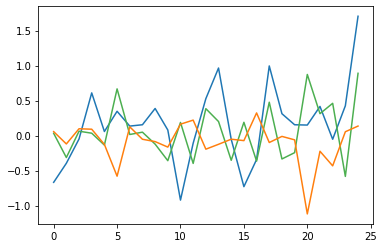

In [15]:
x_vals = []
y_vals = []
z_vals = []

for i in clap_data:
    print(f"{i['index']} clap")
    print(f"x slope: {chunky_slope(i['x'])}")
    print(f"y slope: {chunky_slope(i['y'])}")
    print(f"z slope: {chunky_slope(i['z'])}")

    x_vals += chunky_slope(i['x'])
    y_vals += chunky_slope(i['y'])
    z_vals += chunky_slope(i['z'])

index = np.arange(len(x))
plt.plot(x_vals)
plt.plot(y_vals, color = '#4CAF50')
plt.plot(z_vals)
plt.show()

0 clap
x slope: [-0.11193864000000005, -0.21584474299999998, -0.013867187999999999, 0.34497066, -0.04492200000000002]
y slope: [0.13281249, 0.05959472000000001, -0.005249020000000016, -0.23937989, 0.065307617]
z slope: [-0.05942382, 0.04057619, -0.0022704900000000026, 0.017285139999999997, 0.11145018999999999]
1 clap
x slope: [-0.21052255, -0.05895996400000001, -0.011108398, 0.11865232049999999, 0.2718506]
y slope: [0.24680175899999995, 0.028247070000000006, -0.008789099999999994, -0.038085900000000006, -0.23083494999999998]
z slope: [-0.003515629999999992, -0.04423828, -0.007568400000000003, -0.01318359999999999, -0.03686524999999999]
2 clap
x slope: [-0.31291513, -0.15625, -0.14013675, 0.16979979, 0.3437501500000001]
y slope: [-0.015332034999999983, 0.10651856999999998, -0.00659179999999998, -0.002685549999999981, -0.1809082]
z slope: [-0.017309575999999993, 0.04541017, 0.01831054999999998, 0.055297849999999996, 0.0673828]
3 clap
x slope: [-0.11196284, -0.172460946, -0.031567372, 0.3

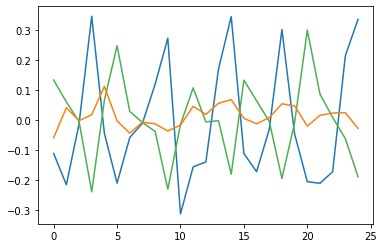

In [16]:
x_vals = []
y_vals = []
z_vals = []

for i in raise_data:
    print(f"{i['index']} clap")
    print(f"x slope: {chunky_slope(i['x'])}")
    print(f"y slope: {chunky_slope(i['y'])}")
    print(f"z slope: {chunky_slope(i['z'])}")

    x_vals += chunky_slope(i['x'])
    y_vals += chunky_slope(i['y'])
    z_vals += chunky_slope(i['z'])

index = np.arange(len(x))
plt.plot(x_vals)
plt.plot(y_vals, color = '#4CAF50')
plt.plot(z_vals)
plt.show()

In [17]:
data = raise_data[0]
data.keys()

dict_keys(['y', 'x', 'index', 'z'])

In [18]:
from build_model import transform_raw

In [19]:
transform_raw(data)

array([[ 0.612112  ,  0.50330232, -0.29277601,  1.22168   ,  0.9128418 ,
        -0.04516602,  0.612112  ,  0.50330232, -0.29277601,  2.14056516,
         1.62046725,  0.46943264,  0.00790201, -0.02046884,  0.0064042 ]])

In [20]:
col = "oh yeah"
new_cols = ["{}_{}".format(col, i) for i in range(5)]
new_cols

['oh yeah_0', 'oh yeah_1', 'oh yeah_2', 'oh yeah_3', 'oh yeah_4']

In [21]:
from build_model import transform_raw

raise_data = [{'y': [0.0859375, 0.267334, 0.1723633, 0.5603027, 0.7158203, 0.7834473, 0.8330078, 0.8979492, 0.8972168, 0.9128418, 0.9020996, 0.8833008, 0.8161621, 0.6821289, 0.4240723, 0.104248, -0.1328125, -0.2404785, -0.002197266], 'x': [1.185059, 1.049805, 1.119873, 0.7885742, 0.6872559, 0.4438477, 0.1669922, 0.06005859, -0.02416992, -0.04614258, -0.05810547, -0.06640625, 0.1740723, 0.5432129, 0.9885254, 1.175537, 1.22168, 1.088623, 1.131836], 'index': 0, 'z': [-0.1933594, -0.1555176, -0.2121582, -0.3725586, -0.4265137, -0.4372559, -0.328125, -0.3276367, -0.411377, -0.4086914, -0.388916, -0.4255371, -0.2910156, -0.2724609, -0.2731934, -0.2331543, -0.2680664, -0.09204102, -0.04516602]}, {'y': [0.05151367, 0.5732422, 0.7312012, 0.8215332, 0.8618164, 0.9438477, 0.9216309, 0.9633789, 0.9335938, 0.9033203, 0.9160156, 0.918457, 0.9367676, 0.8422852, 0.7414551, 0.4880371, 0.2797852], 'x': [1.121094, 0.8188477, 0.5981445, 0.4929199, 0.3688965, 0.03271484, 0.1154785, 0.1447754, 0.02783203, 0.03198242, 0.005615234, -0.008056641, 0.0390625, 0.229248, 0.5639648, 0.9052734, 1.107666], 'index': 1, 'z': [-0.2441406, -0.2468262, -0.2841797, -0.2434082, -0.2145996, -0.3010254, -0.3596191, -0.3425293, -0.3271484, -0.3225098, -0.3422852, -0.2937012, -0.3383789, -0.3200684, -0.2182617, -0.1845703, -0.2919922]}, {'y': [0.5100098, -0.01171875, 0.1645508, 0.4001465, 0.5651855, 0.6794434, 0.7990723, 0.8803711, 0.8574219, 0.861084, 0.8442383, 0.8754883, 0.8847656, 0.8701172, 0.8078613, 0.6074219, 0.4460449], 'x': [1.883301, 1.112549, 0.9592285, 0.8913574, 0.7980957, 0.7299805, 0.5686035, 0.3310547, 0.1320801, -0.09521484, -0.1481934, -0.246582, -0.2792969, 0.09301758, 0.4404297, 0.7539063, 1.12793], 'index': 2, 'z': [-0.534668, -0.06933594, -0.4445801, -0.4672852, -0.4970703, -0.3820801, -0.3439941, -0.3583984, -0.3884277, -0.3098145, -0.3518066, -0.359375, -0.402832, -0.2487793, -0.2866211, -0.2836914, -0.1518555]}, {'y': [0.03662109, -0.2299805, -0.01708984, -0.003417969, 0.5839844, 0.7565918, 0.8417969, 0.9128418, 0.9453125, 0.9223633, 0.8972168, 0.8930664, 0.9077148, 0.8747559, 0.7573242, 0.5581055, 0.2915039, 0.06982422, -0.128418, 0.01171875, -0.006591797], 'x': [1.401611, 1.158936, 1.112549, 1.19751, 0.8225098, 0.6169434, 0.3103027, 0.1809082, 0.08520508, -0.06225586, -0.1147461, -0.1748047, -0.1474609, 0.1337891, 0.4916992, 0.800293, 1.033691, 1.271973, 1.188721, 1.196777, 1.112061], 'index': 3, 'z': [-0.2807617, -0.1882324, -0.02319336, -0.2336426, -0.2319336, -0.2128906, -0.2185059, -0.251709, -0.2453613, -0.3476563, -0.3276367, -0.3132324, -0.3271484, -0.2609863, -0.2199707, -0.1921387, -0.09204102, -0.1777344, -0.2097168, -0.1137695, -0.0534668]}, {'y': [0.03417969, 0.4248047, 0.6313477, 0.7380371, 0.8364258, 0.909668, 0.8793945, 0.8991699, 0.8955078, 0.8769531, 0.895752, 0.7521973, 0.5852051, 0.395752], 'x': [1.162598, 1.015381, 0.7512207, 0.6242676, 0.3950195, 0.2023926, 0.1105957, -0.1826172, -0.2341309, -0.248291, -0.1660156, 0.1787109, 0.7722168, 1.106934], 'index': 4, 'z': [-0.208252, -0.2570801, -0.2495117, -0.2675781, -0.222168, -0.2373047, -0.376709, -0.3027344, -0.3308105, -0.3325195, -0.3232422, -0.2851563, -0.175293, -0.2036133]}]
clap_data = [{'y': [0.3051758, 0.9631348, 0.8183594, 0.4584961, 1.398438, 0.1398926, 0.8405762, 0.1179199, 0.8139648, 0.08178711, 0.9375, 0.5153809, -0.09399414, 0.5820313, 0.2468262, 0.01708984, -0.02636719], 'x': [1.098389, 0.5361328, -0.2949219, -0.8525391, 0.90625, -1.358154, 0.8852539, -1.161865, 0.3269043, -0.9025879, 0.2280273, -0.713623, -0.01049805, 0.5046387, 1.017822, 1.19751, 1.132568], 'index': 0, 'z': [0.03808594, -0.078125, -0.3884277, 0.3273926, 0.7380371, 0.4309082, 0.105957, 0.4462891, 0.5400391, 0.5107422, 0.7336426, 0.2971191, 0.1293945, 0.4777832, 0.1704102, -0.1459961, -0.08325195]}, {'y': [-0.01391602, 0.4296875, 1.05127, 1.999939, 0.6972656, 1.155762, 0.6166992, 0.9267578, 0.4343262, 1.061279, 0.2697754, 0.8581543, 0.9709473, 0.5412598, 0.7258301, 0.7077637, 0.2021484, -0.01025391], 'x': [1.134766, -0.3127441, 0.5537109, 1.999939, 0.006103516, -1.44458, -0.3364258, 0.08642578, -0.9333496, 0.09741211, -1.119141, -0.01416016, -0.2321777, -0.7209473, 0.5407715, 0.9760742, 1.23584, 1.134277], 'index': 1, 'z': [-0.07250977, 0.1113281, 0.04101563, -1.984375, 0.4130859, -0.7570801, 0.2497559, 0.4912109, 0.3950195, 0.704834, 0.6975098, 0.2202148, 0.2009277, 0.5024414, 0.02783203, 0.277832, 0.07006836, -0.05249023]}, {'y': [-0.1542969, 0.2836914, 0.8686523, 0.2729492, 0.9470215, 0.777832, 0.1503906, 0.234375, 0.9897461, 1.001953, 0.208252, 0.8483887, 0.6081543, 0.6772461, 0.1433105, -0.02978516], 'x': [1.581055, 0.9685059, 0.9453125, -1.484619, 0.02783203, 0.3198242, -0.1911621, -1.241211, 0.1237793, -0.1877441, -1.431152, -0.1879883, 0.4975586, 1.232666, 0.9973145, 1.126465], 'index': 2, 'z': [0.04052734, -0.2268066, 0.1352539, 0.4602051, -0.06079102, 0.3417969, 0.3796387, 0.5178223, 0.2509766, 0.1281738, 0.5834961, 0.2634277, 0.333252, 0.02636719, -0.03173828, -0.078125]}, {'y': [-0.03515625, 0.451416, 0.3430176, 0.765625, 1.006104, 0.03466797, 0.2658691, 0.9104004, 1.217529, 1.183594, 0.4277344, 0.5141602, 0.4643555, 0.1328125, -0.0246582], 'x': [1.115723, 1.412842, -0.3447266, -0.3444824, -0.06079102, -1.028809, -1.334717, -0.1586914, 0.6530762, -0.4074707, -0.8945313, 0.2155762, 0.8674316, 1.372314, 1.175293], 'index': 3, 'z': [-0.07983398, 1.050049, -0.2250977, -0.0703125, 0.2475586, 0.5756836, 0.3435059, 0.260498, 0.1442871, 0.05273438, 0.7097168, 0.02807617, 0.06567383, -0.004394531, -0.05737305]}, {'y': [0.2553711, 0.5771484, 1.999939, 0.2023926, 0.154541, 0.8271484, 1.079346, 0.9008789, 1.999939, 1.592041, 0.5725098, 0.4245605, -0.9226074, -0.03369141], 'x': [1.700684, 0.7558594, 1.999939, -1.395264, -1.396729, -0.5646973, 0.722168, 0.3815918, 0.6162109, 0.2268066, 0.5463867, 1.07666, -0.611084, 1.092773], 'index': 4, 'z': [0.2546387, -0.4570313, -1.984375, 0.6169434, 0.6323242, 0.1679688, 0.07006836, 0.1889648, -0.7958984, 0.05053711, 0.1745605, 0.1589355, -0.2133789, -0.078125]}]
    
for data in raise_data:
    print(transform_raw(data))

[[ 0.612112    0.50330232 -0.29277601  1.22168     0.9128418  -0.04516602
   0.612112    0.50330232 -0.29277601  2.14056516  1.62046725  0.46943264
   0.00790201 -0.02046884  0.0064042 ]]
[[ 3.87968181e-01  7.54581239e-01 -2.86779071e-01  1.12109400e+00
   9.63378900e-01 -1.84570300e-01  3.87968181e-01  7.54581239e-01
  -2.86779071e-01  1.59432424e+00  1.04392261e+00  2.09277591e-01
  -6.86287195e-03  3.79255745e-03 -8.65862255e-04]]
[[ 0.53248511  0.64950024 -0.34591854  1.883301    0.8847656  -0.06933594
   0.53248511  0.64950024 -0.34591854  1.99879809  0.91383192  0.42559131
  -0.06067912  0.02933697  0.01000079]]
[[ 6.48391044e-01  4.70249722e-01 -2.15320404e-01  1.40161100e+00
   9.45312500e-01 -2.31933600e-02  6.48391044e-01  4.70249722e-01
  -2.15320404e-01  2.46604665e+00  1.94648239e+00  3.79295462e-01
   9.94635195e-04 -2.51781932e-03  3.40592021e-03]]
[[ 3.92020150e-01  6.96742478e-01 -2.69426629e-01  1.16259800e+00
   9.09668000e-01 -1.75293000e-01  3.92020150e-01  6.96742